<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Создание-функции-для-расчета-прибыли" data-toc-modified-id="Создание-функции-для-расчета-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание функции для расчета прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Проект: "Выбор локации для нефтедобычи"

## Описание проекта

__Задание:__  
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.  
Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*  
Шаги для выбора локации:  
- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

__Условия задания:__  
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

__Ход исследования:__  
- Загрузка и подготовка данных
- Обучение и проверка модели
- Подготовка к расчёту прибыли
- Создание функции для расчета прибыли
- Расчёт прибыли и рисков

__Описание данных:__  
Данные геологоразведки трёх регионов находятся в файлах:  *geo_data_0.csv*, *geo_data_1.csv*, *geo_data_2.csv*.  
Признаки:
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы).  

Целевой признак:  
- `product` — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

Загрузим и подготовим данные. Поясним порядок действий.

In [5]:
# импорт библиотек
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# белая тема plotly
pio.templates.default = 'plotly_white'
# встраивание графиков
%matplotlib inline

In [6]:
# чтение файла данных в датафреймы из папки по умолчанию и из рабочей директории
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv', sep=',')
    df1 = pd.read_csv('/datasets/geo_data_1.csv', sep=',')
    df2 = pd.read_csv('/datasets/geo_data_2.csv', sep=',')
except:
    df0 = pd.read_csv('geo_data_0.csv', sep=',')
    df1 = pd.read_csv('geo_data_1.csv', sep=',')
    df2 = pd.read_csv('geo_data_2.csv', sep=',')

Проведем разведывательный анализ _(EDA)_ с помощью профайлера `ydata_profiling`. Выведем сборные отчеты по каждому из трех датасетов и оценим распределения значений признаков, их статистики, особенности (пропуски, аномалии, уникальные значения), а также взаимною корреляцию признаков.

In [7]:
# # сводка по исходным данным 0-го региона
# ProfileReport(df0, title='Set0 Report')

In [8]:
# # сводка по исходным данным 1-го региона
# ProfileReport(df1, title='Set1 Report')

In [9]:
# # сводка по исходным данным 2-го региона
# ProfileReport(df2, title='Set2 Report')

__Результаты первичного анализа данных:__  
Данные содержатся в трех датасетах, для трех регионов. Обозначим их как *Регион0, Регион1, Регион2.* Каждый датасет включает по пять признаков и 100 тыс. объектов. Обзор данных показал отсутствие в них пропусков, аномалий и дубликатов. Данные содержат только один признак со строковыми значениями - это столбец `id` с идентификаторами скважин. Он не будет принимать участие в обучении. Остальные признаки: `f0`, `f1`, `f2` - числовые, действительного типа, включая `product` - целевой. В связи с этим в качестве алгоритма машинного обучения в проекте будет использоваться простейшая регрессионная модель, а именно - линейная регрессия. Для нее требуется предварительное масштабирование признаков перед обучением. Это будет сделано на следующем шаге после разделения данных на выборки.  
Распределение значений признаков в большинстве носит либо нормальный характер, либо это многомодальное симметричное распределение с выраженным разделением на группы. В первую очередь это касается целевого признака. Объясняющие признаки имеют слабую линейную зависимость между собой, для последнего датасета она и вовсе отсутствует, но в каждом из них у отдельных признаков есть некоторая корреляция с целевым признаком. Для второго датасета признак `f2` имеет очень сильную корреляцию с целевым, близкую 1. К тому же оба признака в датасете имеют одинаково обособленные группы.  
Подводя итог, можно сказать, что признаки в датасетах не нуждаются в предобработке (исключая масштабирование) и не требует принятия мер по устранению проблемы мультиколлинеарности.

## Обучение и проверка модели

Обучим и проверим модель для каждого региона:  
- Разделим данные на обучающую и валидационную выборки в соотношении 75:25.
- Обучим модель и сделаем предсказания на валидационной выборке.
- Посчитаем средний запас предсказанного сырья и _RMSE_ модели.
- Проанализировать результаты.

Мы оперируем однотипными датасетами и чтобы не перезагружать проект излишними переменными будем сохранять данные в ячейках списков и выполнять большинство операций в циклах. Индекс ячейки будет соответствовать порядковому номеру датасета и, соответственно, региона - *0, 1, 2.*  
Разделение на объясняющие и целевой признак, а также разделение на выборки будет реализовано единой функцией.  
Для масштабирования и обучения будет использован *pipeline.*

In [10]:
# функция выделения выборок
def data_split(data, test_frac):
    target = data['product']
    features = data.drop(['id', 'product'], axis=1)
    return train_test_split(features, target, test_size=test_frac, random_state=12345)

In [11]:
# списки под признаки для регионов
features_train, features_valid, target_train, target_valid = [], [], [], []
for df in [df0, df1, df2]:
    split = data_split(df, .25)
    # запись фичей
    features_train.append(split[0]), features_valid.append(split[1])
    # запись таргетов
    target_train.append(split[2]), target_valid.append(split[3])

In [12]:
# списки результатов обучения
predictions, pred_means, real_means, rmse = [], [], [], []
# проход по регионам
for i in range(3):
    # масштабирование и обучение
    pipe = Pipeline([('scalar', StandardScaler()), ('linear_reg', LinearRegression())])
    pipe.fit(features_train[i], target_train[i])
    # расчет прогнозов
    pred = pipe.predict(features_valid[i])
    # индексация и запись прогнозов
    predictions.append(
        pd.Series(pred, index=features_valid[i].index)
    )
    # запись средних значений прогнозов
    pred_means.append(
        pred.mean()
    )
    # запись средних значений реальных запасов
    real_means.append(
        target_valid[i].mean()
    )
    # запись погрешностей прогнозов
    rmse.append(
        mean_squared_error(target_valid[i], pred, squared=False)
    )

In [13]:
# расчетные средние и погрешности по регионам
means_err = pd.DataFrame(
    {'RMSE': rmse, 'Mean predicted': pred_means, 'Mean real': real_means},
    index = ['Region0', 'Region1', 'Region2'])
# разница в расчетных и реальных запасах
means_err['Mean difference, %'] = 100 * (means_err['Mean predicted'] - means_err['Mean real']) / means_err['Mean real']
means_err

,RMSE,Mean predicted,Mean real,"Mean difference, %"
Region0,37.579422,92.592568,92.078597,0.558187
Region1,0.893099,68.728547,68.723136,0.007873
Region2,40.029709,94.965046,94.884233,0.085170


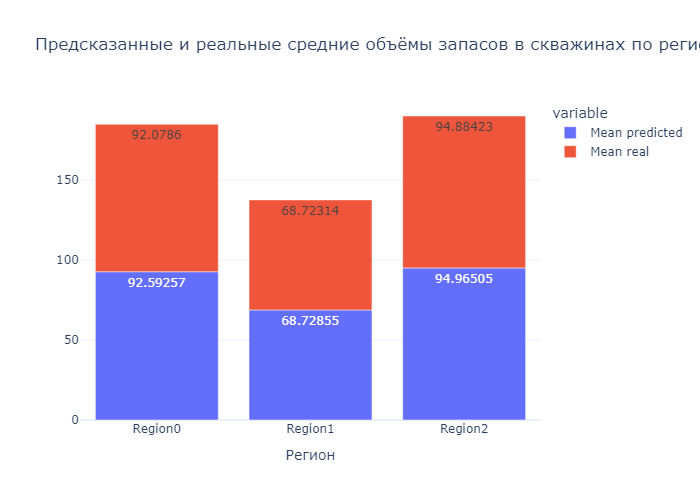

In [14]:
# график предсказанных и реальных средних значений запасов в скважинах 
fig = px.bar(means_err.loc[:, ['Mean predicted', 'Mean real']],
             text_auto=True,
             title=u'Предсказанные и реальные средние объёмы запасов в скважинах по регионам')
fig.update_xaxes(title_text=u'Регион')
fig.update_yaxes(title_text=' ')
fig.show(renderer='png')

Для визуальной оценки качества прогноза построим графики для каждого региона. Для этого случайно отберем некоторое количество образцов из прогнозов и соответствующие им реальные данные.

In [15]:
# списки для построения графиков по прогнозам
pred_to_graf, target_to_graf = [], []
for i in range(3):
    pred_to_graf.append(
        # случайные прогнозы
        predictions[i].sample(500, random_state=12345).sort_values()
    )
    target_to_graf.append(
        # реальные данные
        target_valid[i].loc[pred_to_graf[i].index]
    )

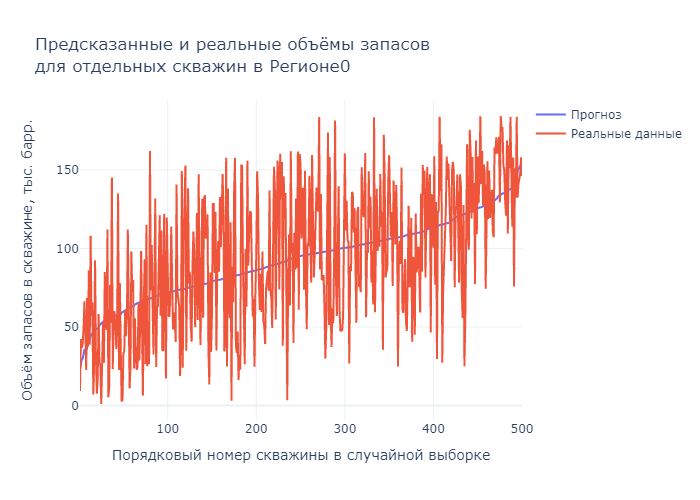

In [16]:
# график изменение значений метрик
fig = go.Figure()
# случайные прогнозы
fig.add_trace(go.Scatter(x=np.linspace(1,500,500),
                         y=pred_to_graf[0],
                         name=u'Прогноз'
                        )
             )
# реальные данные
fig.add_trace(go.Scatter(x=np.linspace(1,500,500),
                         y=target_to_graf[0],
                         name=u'Реальные данные'
                        )
             )
fig.update_layout(title_text=u'Предсказанные и реальные объёмы запасов<br>для отдельных скважин в Регионе0')
fig.update_xaxes(title_text=u'Порядковый номер скважины в случайной выборке')
fig.update_yaxes(title_text=u'Объём запасов в скважине, тыс. барр.')
fig.show(renderer='png')

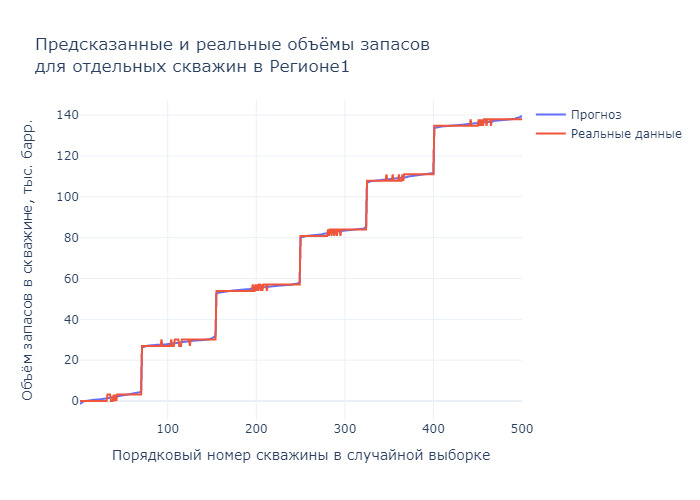

In [17]:
# график изменение значений метрик
fig = go.Figure()
# случайные прогнозы
fig.add_trace(go.Scatter(x=np.linspace(1,500,500),
                         y=pred_to_graf[1],
                         name=u'Прогноз'
                        )
             )
# реальные данные
fig.add_trace(go.Scatter(x=np.linspace(1,500,500),
                         y=target_to_graf[1],
                         name=u'Реальные данные'
                        )
             )
fig.update_layout(title_text=u'Предсказанные и реальные объёмы запасов<br>для отдельных скважин в Регионе1')
fig.update_xaxes(title_text=u'Порядковый номер скважины в случайной выборке')
fig.update_yaxes(title_text=u'Объём запасов в скважине, тыс. барр.')
fig.show(renderer='png')

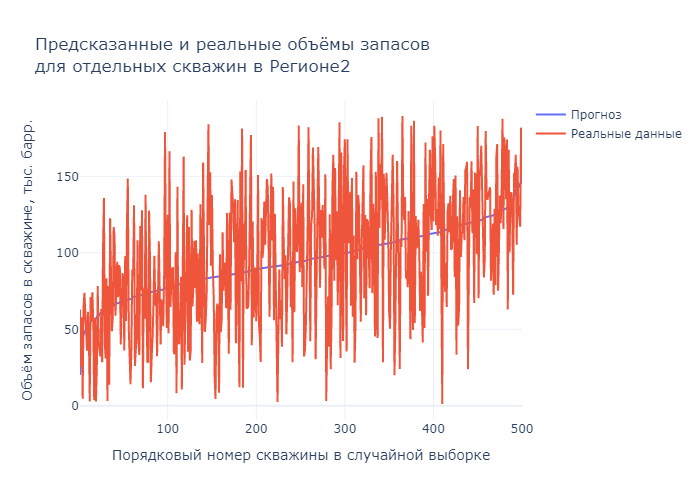

In [18]:
# график изменение значений метрик
fig = go.Figure()
# случайные прогнозы
fig.add_trace(go.Scatter(x=np.linspace(1,500,500),
                         y=pred_to_graf[2],
                         name=u'Прогноз'
                        )
             )
# реальные данные
fig.add_trace(go.Scatter(x=np.linspace(1,500,500),
                         y=target_to_graf[2],
                         name=u'Реальные данные'
                        )
             )
fig.update_layout(title_text=u'Предсказанные и реальные объёмы запасов<br>для отдельных скважин в Регионе2')
fig.update_xaxes(title_text=u'Порядковый номер скважины в случайной выборке')
fig.update_yaxes(title_text=u'Объём запасов в скважине, тыс. барр.')
fig.show(renderer='png')

__Результаты проверки модели:__  
Перед началом обучением модели из данных был выделен целевой признак, а из объясняющих исключен признак с идентификаторами скважин. Впоследствии признак понадобится для создания списка скважин, отобранных для разработки месторождений. Затем было проведено разделение на обучающую и валидационную выборки в соотношение *3:1.* Масштабирование выполнено с помощью `StandardScaler` в конвейере вместе с обучением модели линейной регрессии `LinearRegression`. По результатам обучения сделаны прогнозы, посчитаны средние значения по запасам сырья в скважинах для регионов и погрешности в виде *RSME*. Мы наблюдаем в случаях с *Регионом0* и *Регионом2* мы наблюдаем схожую картину - среднее близко 100 тыс. барр., погрешность велика и составляет более *1/3* от среднего. Для *Региона1* картина разительно отличается - среднее существенно ниже, а погрешность близка к нулю и сильно выделяются отдельные кластеры. Это стало результатом очень сильной корреляции признака `f2` и целевого признака `product`.  
Предсказанные средние объёмы запасов по скважинам практически не отличаются от реальных - разница составляет доли процента. Что говорит о том, что модель хорошо сглаживает реальные данные, не подстраивается под случайные скачки и в равной степени ошибается как в положительную, так и в отрицательную сторону.

## Подготовка к расчёту прибыли

Подготовимся к расчёту прибыли:  
- Все ключевые значения для расчётов сохраним в отдельных переменных.
- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 
- Напишем выводы по этапу подготовки расчёта прибыли.

In [19]:
# число точек для исследования
places_to_explore = 500
# число точек для разработки
places_to_drill = 200
# цена за баррель нефти
barrel_price = 450
# доход с каждой единицы продукта
revenue_per_unit = barrel_price * 1000
# бюджет на разработку скважин в регионе
budget = 10e+9
# критический уровень вероятности убытков
losses_proba_limit = 2.5

In [20]:
# объём сырья для безубыточной разработки скважины
breakeven_volume = budget / places_to_drill / revenue_per_unit
print(f'Достаточный объём сырья для безубыточной разработки новой скважины {breakeven_volume:.2f} тыс.барр.')

Достаточный объём сырья для безубыточной разработки новой скважины 111.11 тыс.барр.


In [21]:
# проверка уровня безубыточности
for i in range(3):
    if real_means[i] >= breakeven_volume:
        print(f'''
        Средний объем сырья {real_means[i]:.2f} тыс.барр. в Регионе{i} 
        обеспечивают безубыточную разработку скважины .
        ''')
    else:
        print(f'''
        Средний объем сырья {real_means[i]:.2f} тыс.барр. в Регионе{i}
        не обеспечивают безубыточную разработку скважины.
        ''')


        Средний объем сырья 92.08 тыс.барр. в Регионе0
        не обеспечивают безубыточную разработку скважины.
        

        Средний объем сырья 68.72 тыс.барр. в Регионе1
        не обеспечивают безубыточную разработку скважины.
        

        Средний объем сырья 94.88 тыс.барр. в Регионе2
        не обеспечивают безубыточную разработку скважины.
        


In [23]:
# датафрейм для построения графиков оценки уровня запасов
means_to_graf = pd.DataFrame({u'Объём сырья, тыс.барр.': [real_means[0], real_means[1], real_means[2], breakeven_volume],
                              u'Тип': [u'Расчетный объём', u'Расчетный объём', u'Расчетный объём', u'Уровень безубытка']},
                             index=['Region0', 'Region1', 'Region2', ''])

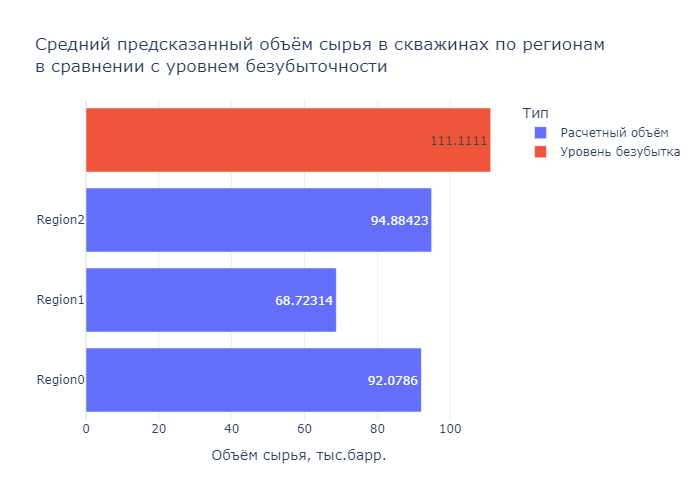

In [24]:
# график оценки уровня запасов
fig = px.bar(means_to_graf,
             x=u'Объём сырья, тыс.барр.',
             color=u'Тип',
             text_auto=True,
             title=u'Средний предсказанный объём сырья в скважинах по регионам<br>в сравнении с уровнем безубыточности')
fig.update_yaxes(title_text='')
fig.show(renderer='png')

__Выводы по этапу подготовки расчёта прибыли:__  
Исходя из размера бюджета на разработку скважин в регионе — 10 млрд рублей, их предполагаемого количества - 200 и нынешних ценах на нефть - один баррель сырья приносит 450 рублей дохода, мы определили минимальный объём запасов сырья, который необходим для безубыточной разработки новой скважины - 111 тыс. баррелей. По прогнозу средние значения объёмов запасов скважин во всех трех регионах не покрывают затрат на их разработку. Особенно низкие значения оказались в *Регионе1.*

## Создание функции для расчета прибыли

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели. Для этого необходимо:  
- Выбрать скважины с максимальными значениями предсказаний. 
- Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитать прибыль для полученного объёма сырья.

Несмотря на обескураживающие первоначальные выводы об убыточности разработки следует проверить возможность получения прибыли на конкретных, наиболее перспективных скважинах. Для этого напишем функцию, предполагающую возможность этого выбора.

Опишем действие функции подробно: 
1. В функцию в виде аргумента поступает список предсказанных объёмов запасов в скважинах.
2. Функция должна выбрать несколько объектов с лучшим прогнозом.
3. На основе данного выбора выделить объекты из списка реальных объёмов, также передаваемых в качестве аргумента.
4. Посчитать суммарный реальные объём и определить его стоимость на основе удельной стоимости 1 барреля.
5. Вычесть из полученной суммы затраты на разработку и вернуть результат.

In [25]:
# функция расчета суммарной прибыли по выбранным скважинам
def revenue(real_volume, pedicted_volume, n_best):
    pred_sorted = pedicted_volume.sort_values(ascending=False)
    selected = real_volume[pred_sorted.index].iloc[:n_best]
    if sorted(pred_sorted[:n_best].index) != sorted(selected.index):
        print("INDEX ERROR")
    if real_volume[pred_sorted.index].shape[0] > 500:
        print("SHAPE ERROR:", real_volume[pred_sorted.index].shape[0])
    return revenue_per_unit * selected.sum() - budget

Проверим работу функции на случайной выборке. По условиям задачи мы исследуем только 500 точек в каждом регионе. В валидационных выборках у нас оказалось 25000 объектов и мы уже сделали по ним прогнозы. Случайным выбором выделим по 500 спрогнозированных значений для каждого региона, которые и будем используем в примере. Из них мы должны отобрать по 200 лучших.

In [26]:
# список результатов для примера
example_revenue  = []
for i in range(3):
    # выделение 500 точек для исследования с индексами
    example_places500 = predictions[i].sample(n=places_to_explore, random_state=12345)
    # расчет суммарной прибыли для примера
    example_revenue.append(
        revenue(target_valid[i], example_places500, places_to_drill)
    )
example_revenue

[679068857.8924255, 779479884.1768169, 439990143.02218056]

Теперь проверим лишь 200 лучших точек и посмотрим на возможный объем полученной прибыли.

In [27]:
# список результатов для примера
example_revenue  = []
for i in range(3):
    # выделение 200 лучших точек для исследования с индексами
    best_places200 = predictions[i].sort_values(ascending=False)[:200]
    # расчет суммарной прибыли для примера
    example_revenue.append(
        revenue(target_valid[i], best_places200, places_to_drill)
    )
example_revenue

[3320826043.1398506, 2415086696.681511, 2710349963.5998325]

__Результаты работы по созданию функции:__  
Написана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели. Функция возвращает общий размер прибыли по региону за вычетом затрат на разработку скважин.  
Функция была проверена на случайных данных, соответствующих условию задачи для проекта по всем регионам. Также была сделана проверка по 200 лучшим точкам каждого региона. Обе проверки выдали неожиданный результат о том, прибыль от разработки все же может быть получена, но для этого необходимо иметь возможность отбора скважин с наибольшими предполагаемыми запасами сырья.

## Расчёт прибыли и рисков

Посчитаем риски и прибыль для каждого региона:
- Применим технику *Bootstrap* с 1000 выборок, чтобы найти распределение прибыли.
- Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Предложим регион для разработки скважин и обоснуем выбор.

Во время проверки функции мы уже запускали ее для одной выборки в соответствии с условиями задачи. Повторим то же самое для 1000 выборок с использованием техники *Bootstrap*. Выходные данные функции будут добавляться в распределение, по которому будут получены среднее и доверительный интервал. Вероятность убытков будет определяться по числу точек с отрицательной прибылью соотнесенному с размером выборки.

In [28]:
state = np.random.RandomState(12345)

# распределение суммарной прибыли для регионов
revenue_distr = []
for i in range(3):
    values = []
    for j in range(1000):
        # выборка точек для исследования
        sample = predictions[i].sample(n=places_to_explore, replace=True, random_state=state)
        values.append(            
            # добавление суммарной прибыли по лучшим точкам в распределение
            revenue(target_valid[i], sample, places_to_drill)
        )
    # запись распределения суммарной прибыли
    revenue_distr.append(pd.Series(values))

In [30]:
# функция расчета доверительного интервала
def conf_interval(sample, limit_percent):
    lower_limit = np.round((1 - limit_percent/100)/2, 3)
    return sample.quantile(lower_limit), sample.quantile(1 - lower_limit)

In [31]:
# функция расчета вероятности потерь
def losses_proba(sample):
    return (sample < 0).mean()

In [32]:
# списки для средней прибыли, доверительных интервалов и вероятности убытка
revenue_means, intervals, losses_probability = [], [], []
for i in range(3):
    # запись средней прибыли
    revenue_means.append(
        revenue_distr[i].mean()
    )
    # запись доверительного интервала
    intervals.append(
        conf_interval(revenue_distr[i], 95)
    )
    # запись вероятности потерь
    losses_probability.append(
        losses_proba(revenue_distr[i])
    )

In [33]:
# транспонирование массива значений доверительных интервалов
intervals = np.array(intervals).T
# датафрейм для средней прибыли, доверительных интервалов и вероятности убытка
statistics = pd.DataFrame({'Distribution Mean': revenue_means,
                           'Lower Limit': intervals[0],
                           'Upper Limit': intervals[1],
                           'Losses Probability': losses_probability
                          },
                          index = ['Region0', 'Region1', 'Region2'])
statistics

,Distribution Mean,Lower Limit,Upper Limit,Losses Probability
Region0,3.961650e+08,-1.112155e+08,9.097669e+08,0.069
Region1,4.611558e+08,7.805081e+07,8.629521e+08,0.007
Region2,3.929505e+08,-1.122276e+08,9.345629e+08,0.065


Проверим уровень вероятности убытков по регионам в сравнении с пороговым значением 2.5%. 

In [34]:
# проверка уровня вероятности убытков
for i in range(3):
    prob = 100 * statistics.iloc[i, -1]
    if prob > losses_proba_limit:
        print(f'Вероятность убытков по Региону{i} в {prob:.1f}% превышает критический уровень {losses_proba_limit}%.')
    else:
        print(f'Вероятность убытков по Региону{i} в {prob:.1f}% меньше критического уровня {losses_proba_limit}%.')

Вероятность убытков по Региону0 в 6.9% превышает критический уровень 2.5%.
Вероятность убытков по Региону1 в 0.7% меньше критического уровня 2.5%.
Вероятность убытков по Региону2 в 6.5% превышает критический уровень 2.5%.


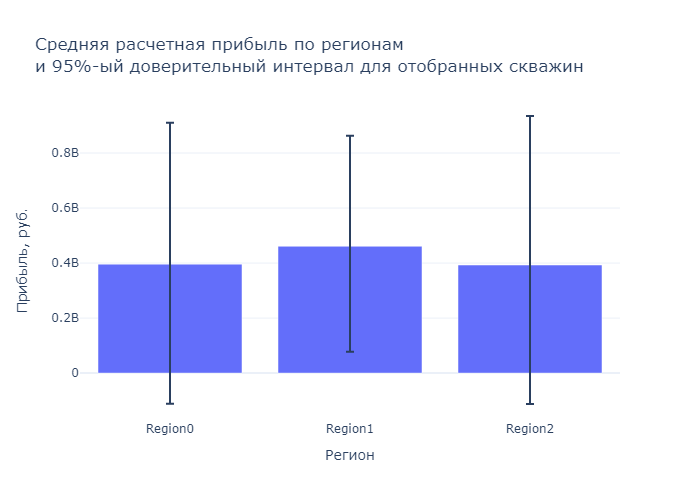

In [35]:
# график средней прибыли и 95%-го доверительного интервала
fig = go.Figure()
fig.add_trace(go.Bar(name='Distribution Mean',
                     x=statistics.index,
                     y=statistics['Distribution Mean'],
                     # границы доверитеотного интервала
                     error_y=dict(type='data',
                                  symmetric=False,
                                  array=statistics['Upper Limit'] - statistics['Distribution Mean'],
                                  arrayminus=statistics['Distribution Mean'] - statistics['Lower Limit'])
                    )
             )
fig.update_xaxes(title_text=u'Регион')
fig.update_yaxes(title_text=u'Прибыль, руб.')
fig.update_layout(title_text =\
                  u'''Средняя расчетная прибыль по регионам<br>и 95%-ый доверительный интервал для отобранных скважин''')
fig.show(renderer='png')

__Результаты расчёта прибыли по регионам:__  
С использованием техники *Bootstrap* и написанной ранее функции для расчёта прибыли по выбранным скважинам для каждого региона было создано распределение суммарной прибыли по данным ответов из валидационной выборки. Результаты *Региону0* и *Региону2* схожи -  они показывают меньшую среднюю прибыль по сравнению с *Регионом1*, левая граница доверительного интервала в зоне отрицательных значений. Правая граница доверительно интервала у них немного дальше, чем у *Региона1*. Но, в целом, из-за более высокого среднего значения суммарной прибыли и нахождении доверительного интервала в области положительных значений *Регион1* является наиболее предпочтительным. А с учетом ограничения по вероятности убытка в 2.5% он оказывается еще и единственно возможным выбором.

## Общие выводы

__Заключение о проделанной работе:__  

В ходе выполнения работы над проектом с помощью инструмента `ProfileReport` библиотеки `ydata_profiling` был сделан детальный исследовательский анализ исходным данных и сделаны подробные выводы об их характере и обнаруженных в них закономерностях. Данные по регионам были разбиты на обучающие и валидационные выборки в соотношении 3:1. На их основе с было проведено обучение моделей линейной регрессии для каждого региона с предварительным масштабированием признаков. Обе операции были объединены в конвейере `Pipeline` библиотеки `scikit-learn`. По предсказанным данным были найдены средние значения, величины погрешностей по *RSME* и построены графики.  
Для оценки качества прогноза была написана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели. В функции были учтены затраты на разработку скважин. Впоследствии она была использована для создания распределений суммарно прибыли отобранных точек техникой *Bootstrap*. На их основе были получены доверительные интервалы, размеры средней прибыли и вероятности убытков. После чего с помощью этих данных было принято решение о выборе региона для разработки скважин.

__Вывод по выбору локации:__  

С самого начала, еще на этапе *EDA* было видно, что данные по *Региону1* сильно отличаются от двух других. И прежде всего по значительной корреляции между признаком `f2` и целевым признаком `product`. Это выразилось как в очень сильной линейной зависимости, так и в одинаковом разделении данных на четко разделенные группы. В итоге это сказалось на крайне высоком качестве прогноза с низким значением погрешности по *RSME*. Хотя средние предсказанные значения для *Региона1* оказались более низкие по сравнению с остальными, однако, возможность более точного выбора точек с наибольшими предсказанными запасами вывело его в лидеры. Исследование распределений суммарной прибыли, проведенное техникой *Bootstrap* показало, что средняя прибыль точек с лучшими прогнозами у этого региона самая высокая, а доверительный интервал только у него лежит в области положительных значений. Окончательный отказ от *Региона0* и *Региона2* в пользу *Региона1* был сделан, когда они не прошли проверку уровня безубыточности в 2.5%.